# **NLP: Projeto de Ingresso**

#### Ánalise de sentimentos de um dataset de reviews de videogame da Amazon.

### Importando bibliotecas e dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import numpy as np

In [2]:
df_train = pd.read_csv("video_games_reviews_train.csv")
df_test = pd.read_csv("video_games_reviews_test.csv")
df_dev = pd.read_csv("video_games_reviews_dev.csv")

### Observações iniciais

In [3]:
df_train.head()

,level_0,index,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,9604,222941,A1U1AK7HKB2BLN,B00CX6XKK6,jayfer,"[4, 51]",ive got to play this on both consoles now and ...,1,wasted 500 dollars on the xbox one.,1385078400,"11 22, 2013"
1,5428,106670,A1L1D50VH2AX7J,B0017UFWMS,Anjoyla,"[0, 0]",This game gives you a series of word puzzles t...,2,Margots Word Brain,1321833600,"11 21, 2011"
2,198,24455,A2JWU211CM0BYE,B00005RCR0,DCN2049,"[0, 1]",You should pretty much already know what this ...,4,"Excellent product, watch the discs",1360540800,"02 11, 2013"
3,6070,42574,A1DP3YZ2OQWAP4,B0000ARQMW,liz,"[0, 0]",I really like this game i love all the challen...,5,Jammin banging game,1383436800,"11 3, 2013"
4,11616,172598,A48Z207T98FN0,B004HYK8Y8,The Reverend,"[296, 368]",*** please read the 12/9/11 update below this ...,1,Consumers are NOT Beta-Testers !!! (updated),1322784000,"12 2, 2011"


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   level_0         8000 non-null   int64 
 1   index           8000 non-null   int64 
 2   reviewerID      8000 non-null   object
 3   asin            8000 non-null   object
 4   reviewerName    7916 non-null   object
 5   helpful         8000 non-null   object
 6   reviewText      7999 non-null   object
 7   overall         8000 non-null   int64 
 8   summary         8000 non-null   object
 9   unixReviewTime  8000 non-null   int64 
 10  reviewTime      8000 non-null   object
dtypes: int64(4), object(7)
memory usage: 687.6+ KB


Assim, temos:

- reviewerID: ID do revisor;
- asin: ID do produto;
- reviewerName: nome do revisor;
- helpful: classificação da utilidade da review;
- reviewText: texto da review;
- overall: classificação do produto;
- summary: sumário da review;
- unixReviewTime: data unix da review;
- reviewTime: data da review.

In [5]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
level_0,8000.0,6.260771e+03,3.615951e+03,0.0,3.123500e+03,6.281500e+03,9.398250e+03,1.249800e+04
index,8000.0,1.155899e+05,6.623350e+04,0.0,5.911600e+04,1.132665e+05,1.719198e+05,2.317790e+05
overall,8000.0,3.015625e+00,1.416909e+00,1.0,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
unixReviewTime,8000.0,1.272152e+09,1.161811e+08,942192000.0,1.206317e+09,1.309262e+09,1.365228e+09,1.405987e+09


In [6]:
df_train.describe(include=['object']).T

,count,unique,top,freq
reviewerID,8000,6038,AJKWF4W7QD4NS,29
asin,8000,4368,B00178630A,35
reviewerName,7916,5709,Amazon Customer,56
helpful,8000,783,"[0, 0]",2381
reviewText,7999,7999,ive got to play this on both consoles now and ...,1
summary,8000,7574,Great game,22
reviewTime,8000,3361,"11 22, 2013",18


## **Parte 1 - Pré-precessamento**

### Limpeza de dados

In [7]:
df_train.reviewText[20]

"I was expecting a cool combat system for LC. Never got it. Moves feel choppy and disconnected to my inputs and scenarios were not that interesting. Since I paid only $20, I may have kept it for the sex-appeal, but that also lacked. Like some slutty teenager, this game tries to hard to get you excited, but fails. Or maybe I'm getting to old for this? No, kids are all wrong. :P"

In [8]:
df_train.dropna(subset = ['reviewText'], inplace = True)

In [9]:
df_test.dropna(subset = ['reviewText'], inplace = True)

In [10]:
df_dev.dropna(subset = ['reviewText'], inplace = True)

### Alterando letras maiúsculas

In [11]:
df_train['reviewText'] = df_train['reviewText'].str.lower()

In [12]:
df_test['reviewText'] = df_test['reviewText'].str.lower()

In [13]:
df_dev['reviewText'] = df_dev['reviewText'].str.lower()

In [14]:
df_train.head()

,level_0,index,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,9604,222941,A1U1AK7HKB2BLN,B00CX6XKK6,jayfer,"[4, 51]",ive got to play this on both consoles now and ...,1,wasted 500 dollars on the xbox one.,1385078400,"11 22, 2013"
1,5428,106670,A1L1D50VH2AX7J,B0017UFWMS,Anjoyla,"[0, 0]",this game gives you a series of word puzzles t...,2,Margots Word Brain,1321833600,"11 21, 2011"
2,198,24455,A2JWU211CM0BYE,B00005RCR0,DCN2049,"[0, 1]",you should pretty much already know what this ...,4,"Excellent product, watch the discs",1360540800,"02 11, 2013"
3,6070,42574,A1DP3YZ2OQWAP4,B0000ARQMW,liz,"[0, 0]",i really like this game i love all the challen...,5,Jammin banging game,1383436800,"11 3, 2013"
4,11616,172598,A48Z207T98FN0,B004HYK8Y8,The Reverend,"[296, 368]",*** please read the 12/9/11 update below this ...,1,Consumers are NOT Beta-Testers !!! (updated),1322784000,"12 2, 2011"


In [15]:
df_test.head()

,level_0,index,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,12154,25980,A16416X67B4ZKJ,B00005V6BB,"""mcfly70""","[1, 1]","moh was good and all, but when you reach the c...",4,MOH: THE ACTUAL WAR WAS BETTER THE 3RD MCFLY R...,1035158400,"10 21, 2002"
1,7333,215010,A2Q2ADX9C9I5WZ,B00AZWE7ES,MCRC,"[0, 4]",i am so glad i only paid $15 for this game dur...,2,15 fps? really?,1399334400,"05 6, 2014"
2,6703,188851,A30IXQWBRD3GU9,B0053BCO00,Jerry,"[0, 0]",forget this mario kart get mario kart ds or th...,3,ehhhh,1373414400,"07 10, 2013"
3,5649,93541,A1S7NYZF69KYAP,B000VRCNLG,Peanut Pedro,"[0, 1]",when i purchased this game from amazon i certa...,1,Defective Disk/Great Seller,1348963200,"09 30, 2012"
4,2955,24169,A2MPAOYEC1KWEI,B00005R5PO,Mali,"[0, 0]",i love platform games but not many are out the...,4,It's not Spyro...,1073260800,"01 5, 2004"


In [16]:
df_train.reviewText[20]

"i was expecting a cool combat system for lc. never got it. moves feel choppy and disconnected to my inputs and scenarios were not that interesting. since i paid only $20, i may have kept it for the sex-appeal, but that also lacked. like some slutty teenager, this game tries to hard to get you excited, but fails. or maybe i'm getting to old for this? no, kids are all wrong. :p"

In [17]:
df_test.reviewText[20]

'having just completed this game the question on my mind is: what were they thinking?  since it\'s early incarnation as an \'80s 2d platformer prince of persia has been all about fluid animation, traps, and acrobatics.  now we have "warrior within"  a game that\'s not even supposed to be played by anyone under 17.  i\'m an adult who enjoys a lot of "m" rated games. prince of persia should not be one of them.  "sands of time" had a unique, disney-with-an-edge feel that "warrior within" completely sneers at.  did the halo guys call the ubi soft guys "wusses" at some game convention?  who knows.  something\'s got to explain the abandonment of nearly everything that made sot a great game.and if you buy this game be prepared to spend a lot of time looking at loading screens.  but what about that rewind button?  there\'s been some industry talk of doing away with the you died/reload screens and "sands of time" took a huge step in that direction with it\'s innovative rewind feature.  "warrior

### Removendo pontuações

In [18]:
import re

In [19]:
def remove_ponctuation(text):

  text = re.sub(r'[^\w\s]', '', text)
  return text

#### df_train

In [20]:
df_train['reviewText'] = df_train.reviewText.apply(remove_ponctuation)

#### df_test

In [21]:
df_test['reviewText'] = df_test.reviewText.apply(remove_ponctuation)

#### df_dev

In [22]:
df_dev.reviewText = df_dev.reviewText.astype('str')

In [23]:
df_dev['reviewText'] = df_dev.reviewText.apply(remove_ponctuation)

In [24]:
df_test.reviewText[20]

'having just completed this game the question on my mind is what were they thinking  since its early incarnation as an 80s 2d platformer prince of persia has been all about fluid animation traps and acrobatics  now we have warrior within  a game thats not even supposed to be played by anyone under 17  im an adult who enjoys a lot of m rated games prince of persia should not be one of them  sands of time had a unique disneywithanedge feel that warrior within completely sneers at  did the halo guys call the ubi soft guys wusses at some game convention  who knows  somethings got to explain the abandonment of nearly everything that made sot a great gameand if you buy this game be prepared to spend a lot of time looking at loading screens  but what about that rewind button  theres been some industry talk of doing away with the you diedreload screens and sands of time took a huge step in that direction with its innovative rewind feature  warrior within still has rewind but it completely nega

In [25]:
df_train.reviewText[20]

'i was expecting a cool combat system for lc never got it moves feel choppy and disconnected to my inputs and scenarios were not that interesting since i paid only 20 i may have kept it for the sexappeal but that also lacked like some slutty teenager this game tries to hard to get you excited but fails or maybe im getting to old for this no kids are all wrong p'

In [26]:
df_dev.reviewText[20]

'about three weeks ago i decided to buy a gaming desktop  with no knowledge of desktop gaming peripherals i searched amazon to try and find an awesome gaming mouse  youll never guess which one i decided to invest in  what  this one  well you guessed right  this mouse makes me happy in all the right waysprosfully customizable buttonseasy to use software for changing mouse optionsplacement of buttons is perfectgood logitech qualityconsthe weights that come with the mouse barely change the overall weightthe wheel buttons is a little difficult to push i end up rarely using it due to thisin conclusion i was quite satisfied with my purchase  there could be better mice out there but this one gets the job done for me at a decent price'

### Tokenização

In [27]:
import nltk

In [28]:
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\isaca\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### df_train

In [29]:
df_train['tokens'] = df_train['reviewText'].copy(deep = True)
df_train['tokens'] = df_train['tokens'].apply(str)
df_train['tokens'] = df_train['tokens'].apply(word_tokenize)

In [30]:
df_train['tokens'].head()

0    [ive, got, to, play, this, on, both, consoles,...
1    [this, game, gives, you, a, series, of, word, ...
2    [you, should, pretty, much, already, know, wha...
3    [i, really, like, this, game, i, love, all, th...
4    [please, read, the, 12911, update, below, this...
Name: tokens, dtype: object

#### df_test

In [31]:
df_test['tokens'] = df_test['reviewText'].copy(deep = True)
df_test['tokens'] = df_test['tokens'].apply(str)
df_test['tokens'] = df_test['tokens'].apply(word_tokenize)

In [32]:
df_test['tokens'].head()

0    [moh, was, good, and, all, but, when, you, rea...
1    [i, am, so, glad, i, only, paid, 15, for, this...
2    [forget, this, mario, kart, get, mario, kart, ...
3    [when, i, purchased, this, game, from, amazon,...
4    [i, love, platform, games, but, not, many, are...
Name: tokens, dtype: object

#### df_dev

In [33]:
df_dev['tokens'] = df_dev['reviewText'].copy(deep = True)
df_dev['tokens'] = df_dev['tokens'].apply(str)
df_dev['tokens'] = df_dev['tokens'].apply(word_tokenize)

In [34]:
df_dev['tokens'].head()

0    [to, start, off, this, review, let, me, tell, ...
1    [iron, man, 2, on, nintendo, wii, is, really, ...
2    [first, off, this, game, is, very, addicting, ...
3    [this, is, seriously, the, best, simpsons, gam...
4    [blacksite, has, a, great, story, a, very, cur...
Name: tokens, dtype: object

### Removendo Stopwords

In [35]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\isaca\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
stopwords = nltk.corpus.stopwords.words('english')

#### df_train

In [37]:
df_train['tokens'] = df_train['tokens'].apply(
    lambda x: [str(word) for word in x if word not in stopwords])

In [38]:
df_train['tokens'].head()

0    [ive, got, play, consoles, honestly, say, look...
1    [game, gives, series, word, puzzles, figure, b...
2    [pretty, much, already, know, game, youre, rea...
3    [really, like, game, love, challenges, love, d...
4    [please, read, 12911, update, article, ps3, us...
Name: tokens, dtype: object

#### df_test

In [39]:
df_test['tokens'] = df_test['tokens'].apply(
    lambda x: [str(word) for word in x if word not in stopwords])

In [40]:
df_test['tokens'].head()

0    [moh, good, reach, couple, last, levels, there...
1    [glad, paid, 15, game, sonys, golden, week, sa...
2    [forget, mario, kart, get, mario, kart, ds, on...
3    [purchased, game, amazon, certainly, looked, f...
4    [love, platform, games, many, tried, crash, ba...
Name: tokens, dtype: object

#### df_dev

In [41]:
df_dev['tokens'] = df_dev['tokens'].apply(
    lambda x: [str(word) for word in x if word not in stopwords])

In [42]:
df_dev['tokens'].head()

0    [start, review, let, tell, bought, mortal, kom...
1    [iron, man, 2, nintendo, wii, really, fantasti...
2    [first, game, addicting, much, fun, prince, pe...
3    [seriously, best, simpsons, game, ever, ive, p...
4    [blacksite, great, story, current, world, cour...
Name: tokens, dtype: object

### Lemmatização

In [43]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\isaca\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [44]:
lemmatizer = nltk.stem.WordNetLemmatizer()

#### df_train

In [45]:
def lemmatize_text(text):
  return [lemmatizer.lemmatize(w) for w in text]

In [46]:
df_train['lemmas'] = df_train['tokens'].apply(lemmatize_text)

In [47]:
df_train.head()

,level_0,index,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,tokens,lemmas
0,9604,222941,A1U1AK7HKB2BLN,B00CX6XKK6,jayfer,"[4, 51]",ive got to play this on both consoles now and ...,1,wasted 500 dollars on the xbox one.,1385078400,"11 22, 2013","[ive, got, play, consoles, honestly, say, look...","[ive, got, play, console, honestly, say, look,..."
1,5428,106670,A1L1D50VH2AX7J,B0017UFWMS,Anjoyla,"[0, 0]",this game gives you a series of word puzzles t...,2,Margots Word Brain,1321833600,"11 21, 2011","[game, gives, series, word, puzzles, figure, b...","[game, give, series, word, puzzle, figure, bou..."
2,198,24455,A2JWU211CM0BYE,B00005RCR0,DCN2049,"[0, 1]",you should pretty much already know what this ...,4,"Excellent product, watch the discs",1360540800,"02 11, 2013","[pretty, much, already, know, game, youre, rea...","[pretty, much, already, know, game, youre, rea..."
3,6070,42574,A1DP3YZ2OQWAP4,B0000ARQMW,liz,"[0, 0]",i really like this game i love all the challen...,5,Jammin banging game,1383436800,"11 3, 2013","[really, like, game, love, challenges, love, d...","[really, like, game, love, challenge, love, di..."
4,11616,172598,A48Z207T98FN0,B004HYK8Y8,The Reverend,"[296, 368]",please read the 12911 update below this artic...,1,Consumers are NOT Beta-Testers !!! (updated),1322784000,"12 2, 2011","[please, read, 12911, update, article, ps3, us...","[please, read, 12911, update, article, ps3, us..."


#### df_test

In [48]:
df_test['lemmas'] = df_test['tokens'].apply(lemmatize_text)

In [49]:
df_test.head()

,level_0,index,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,tokens,lemmas
0,12154,25980,A16416X67B4ZKJ,B00005V6BB,"""mcfly70""","[1, 1]",moh was good and all but when you reach the co...,4,MOH: THE ACTUAL WAR WAS BETTER THE 3RD MCFLY R...,1035158400,"10 21, 2002","[moh, good, reach, couple, last, levels, there...","[moh, good, reach, couple, last, level, therel..."
1,7333,215010,A2Q2ADX9C9I5WZ,B00AZWE7ES,MCRC,"[0, 4]",i am so glad i only paid 15 for this game duri...,2,15 fps? really?,1399334400,"05 6, 2014","[glad, paid, 15, game, sonys, golden, week, sa...","[glad, paid, 15, game, sonys, golden, week, sa..."
2,6703,188851,A30IXQWBRD3GU9,B0053BCO00,Jerry,"[0, 0]",forget this mario kart get mario kart ds or th...,3,ehhhh,1373414400,"07 10, 2013","[forget, mario, kart, get, mario, kart, ds, on...","[forget, mario, kart, get, mario, kart, d, one..."
3,5649,93541,A1S7NYZF69KYAP,B000VRCNLG,Peanut Pedro,"[0, 1]",when i purchased this game from amazon i certa...,1,Defective Disk/Great Seller,1348963200,"09 30, 2012","[purchased, game, amazon, certainly, looked, f...","[purchased, game, amazon, certainly, looked, f..."
4,2955,24169,A2MPAOYEC1KWEI,B00005R5PO,Mali,"[0, 0]",i love platform games but not many are out the...,4,It's not Spyro...,1073260800,"01 5, 2004","[love, platform, games, many, tried, crash, ba...","[love, platform, game, many, tried, crash, ban..."


#### df_dev

In [50]:
df_dev['lemmas'] = df_dev['tokens'].apply(lemmatize_text)

In [51]:
df_dev.head()

,level_0,index,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,tokens,lemmas
0,11509,4196,A2TCG2HV1VJP6V,B000021Y32,Ryan Sil. (Creator of Dynamite Alex for Andro...,"[0, 0]",to start off this review let me tell you that ...,2,Strangely like its sequel,1299369600,"03 6, 2011","[start, review, let, tell, bought, mortal, kom...","[start, review, let, tell, bought, mortal, kom..."
1,1571,147673,A2WVCV1NFR0R07,B002WDL51Q,charles,"[0, 0]",iron man 2 on nintendo wii is really fantastic...,5,Wow!,1374105600,"07 18, 2013","[iron, man, 2, nintendo, wii, really, fantasti...","[iron, man, 2, nintendo, wii, really, fantasti..."
2,2619,59077,A22Y1BUB20E150,B0009Z3IV4,Adam B,"[0, 0]",first off this game is very addicting and so m...,4,WOW!!!,1147651200,"05 15, 2006","[first, game, addicting, much, fun, prince, pe...","[first, game, addicting, much, fun, prince, pe..."
3,4790,38437,A22BFGHM9X80OE,B000095ZH5,"Bill.B ""Bill""","[0, 0]",this is seriously the best simpsons game ever ...,4,BEST SIMPSONS GAME EVER!,1091577600,"08 4, 2004","[seriously, best, simpsons, game, ever, ive, p...","[seriously, best, simpson, game, ever, ive, pl..."
4,8413,82180,A323T7DISVMHPZ,B000O5FULU,Austin Anderson,"[33, 38]",blacksite has a great story a very current wor...,2,This is why Area 51 is kept secret,1198108800,"12 20, 2007","[blacksite, great, story, current, world, cour...","[blacksite, great, story, current, world, cour..."


## **Parte 2 - Análise do corpus**

A análise a seguir será realizada a partir do dataset de treino, uma vez que esse será utilizado posteriormente para treinar os modelos de predição.

In [52]:
# criando dataframe para a análise

data_analise = pd.DataFrame()

data_analise['Score'] = df_train['overall']
data_analise['Text'] = df_train['lemmas']

### Review Scores

In [53]:
data_analise['Score'].value_counts()

5    1632
3    1608
4    1606
1    1591
2    1562
Name: Score, dtype: int64

Como o overall original apresenta 5 valores diferentes, classificaremos as reviews apenas como negativa (menor ou igual a 3) ou positiva (demais valores).

In [54]:
# classificando as reviews

labels = []

for x in data_analise['Score']:
  if x > 3:
     labels.append(1)
  else:
    labels.append(0)

data_analise['label'] = labels

C:\Users\isaca\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


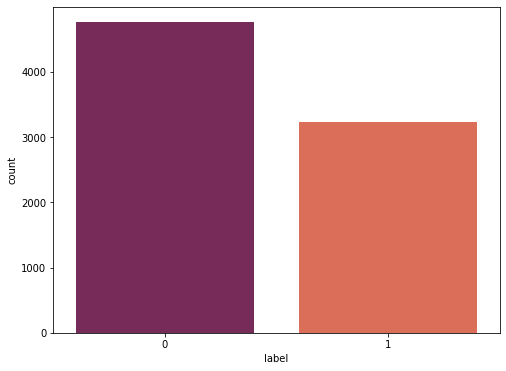

In [55]:
plt.figure(figsize=(8,6))
sns.countplot(data_analise['label'], palette="rocket")
plt.show()

Dessa forma, é possível observar que existem mais reviews negativas em comparação à reviews positivas.

### Frequência Lexical

In [56]:
from nltk.probability import FreqDist

In [57]:
def string(list):
  final_text = ''
  for word in list:
    final_text = final_text + ' ' + word
  return final_text[1:]

In [58]:
words_review = data_analise['Text'].apply(string)

In [59]:
lista_palavras = []

for string in data_analise['Text']:
  for word in string:
    lista_palavras.append(word)

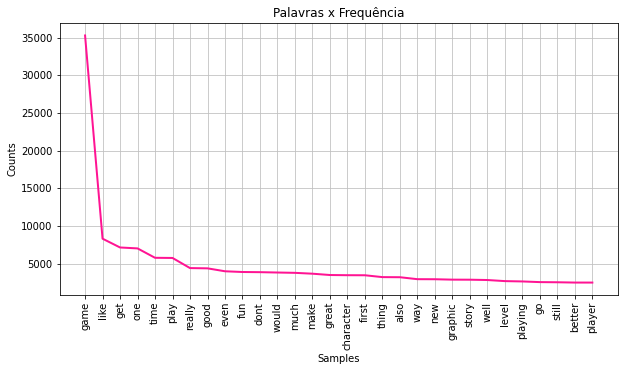

<AxesSubplot:title={'center':'Palavras x Frequência'}, xlabel='Samples', ylabel='Counts'>

In [60]:
plt.figure(figsize=(10,5))
fd = nltk.FreqDist(lista_palavras)
fd.plot(30,title = "Palavras x Frequência",cumulative=False, color= "deeppink")

Naturalmente, a palavra que aparece em disparada com mais frequência nas avaliações de jogos é "game". Em segundo lugar, temos a palavra "like", que pode ser usada não somente como a ação de gostar de algo, mas também como uma conjunção no inglês, o que explicaria sua alta ocorrência em relação às demais palavras que seguem quase a mesma faixa de ocorrência. Também se destacam outros adjetivos como "good", "fun", "great", mas é proveitoso enfatizar a frequência da negação "don't", fato que pode alterar o sentido positivo de alguns lexemas apontados.

### Frequência de termos (bigramas)

In [61]:
from nltk import bigrams

In [62]:
data_analise['Text']

0       [ive, got, play, console, honestly, say, look,...
1       [game, give, series, word, puzzle, figure, bou...
2       [pretty, much, already, know, game, youre, rea...
3       [really, like, game, love, challenge, love, di...
4       [please, read, 12911, update, article, ps3, us...
                              ...                        
7995    [arrived, mail, promptly, working, great, far,...
7996    [game, perfect, example, style, substancethe, ...
7997    [let, tell, start, im, big, yugioh, fan, dont,...
7998    [2400, new, game, delivers, bought, game, sole...
7999    [fun, game, graphic, sound, spot, gameplay, sm...
Name: Text, Length: 7999, dtype: object

In [63]:
bigramas = []

for i in data_analise.index:
    if len(data_analise['Text'][i]) > 2:
        bigramas.append([item for item in bigrams(data_analise['Text'][i])])
    else:
        bigramas.append([])

In [64]:
bigrams_list = []
for sentence in bigramas:
  for bigrama in sentence:
    bigrams_list.append(bigrama)

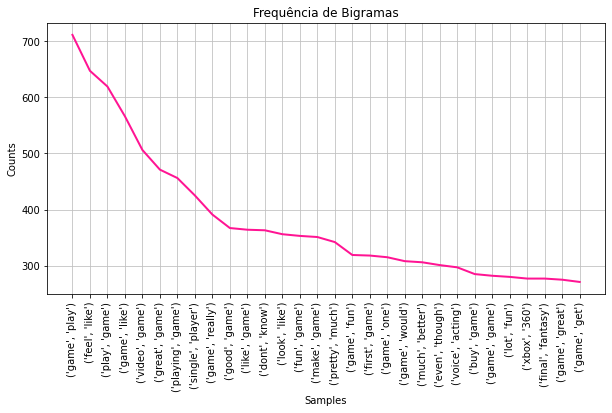

<AxesSubplot:title={'center':'Frequência de Bigramas'}, xlabel='Samples', ylabel='Counts'>

In [65]:
plt.figure(figsize=(10,5))
fd = nltk.FreqDist(bigrams_list)
fd.plot(30,title = "Frequência de Bigramas",cumulative=False, color= "deeppink")

Analisando os bigramas, é possível perceber que as maiores frequências são das palavras que aparecem normalmente aparecem juntas no contexto das avaliações, como "game play", "video game" ou "single player", além de nomes compostos como "xbox 360" e "final fantasy". Outros elementos que são frequentemente combinados são expressões que poderão indicar os sentimentos e as opiniões, positivos ou negativos, da pessoa que escreveu a avaliação, por exemplo "feel like", "don't know" ou "pretty much".

### Relação do tamanho das reviews

In [66]:
# nova coluna para a quantidade de caracteres de cada review

data_analise['Length'] = data_analise['Text'].apply(len)

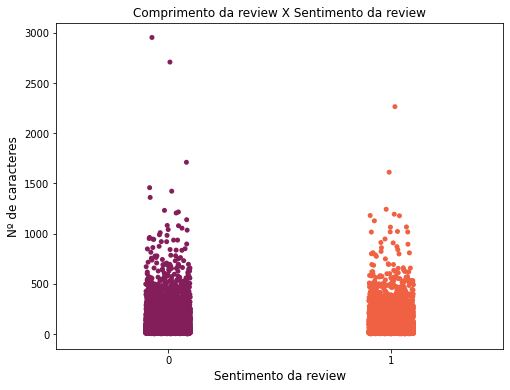

In [67]:
plt.figure(figsize=(8,6))
sns.stripplot(x="label", y="Length", data= data_analise, palette="rocket")
plt.title('Comprimento da review X Sentimento da review', fontsize = 12)
plt.ylabel('Nº de caracteres', fontsize = 12)
plt.xlabel('Sentimento da review', fontsize = 12)
plt.show()

Embora existam outliers, independente do sentimento, as reviews no geral possuem uma média bem parecida de número de caracteres. Também é possível notar que geralmente os textos das avaliações são mais dinâmicos, concentrados abaixo de 500 caracteres. Apesar disso, é perceptível que os maiores textos são de avaliadores descontentes com o jogo, ou seja, as avaliações negativas usaram mais caracteres.

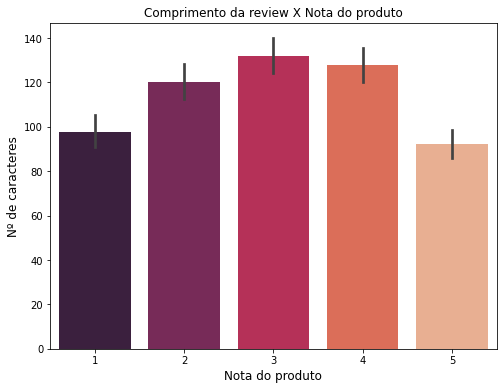

In [68]:
plt.figure(figsize=(8,6))
sns.barplot(x="Score", y="Length", data= data_analise, palette="rocket")
plt.title('Comprimento da review X Nota do produto', fontsize = 12)
plt.ylabel('Nº de caracteres', fontsize = 12)
plt.xlabel('Nota do produto', fontsize = 12)
plt.show()

Ao relacionar a nota do produto com o número de caracteres da avaliação, é perceptível que as reviews com nota máxima são as que apresentam menos caracteres. Porém, a nota 4, que é considerada uma boa avaliação, perde por pouco em número de caracteres apenas para a nota média, que seria 3, cujas reviews possuem mais caracteres em comparação às demais. Com isso, a nota mediana ser conferida às avaliações com mais caracteres pode ser justificado pelo fato de que como as pessoas não amam nem odeiam o jogo, a review tende a ser mais extensa, uma vez que o avaliador irá expor tanto os pontos positivos, como  os pontos negativos do produto. Além disso, a pior nota supera a maior nota em número de caracteres, naturalmente. 

## **Parte 3 - Modelagem e feature engineering**

Feature extraction: transformar o texto em uma informação numérica de modo que seja possível utilizá-lo para alimentar um modelo.

In [69]:
# treino

labels = []

for x in df_train['overall']:
  if x > 3:
     labels.append(1)
  else:
    labels.append(0)

df_train['label'] = labels

In [70]:
df_train['label']

0       0
1       0
2       1
3       1
4       0
       ..
7995    0
7996    0
7997    1
7998    1
7999    1
Name: label, Length: 7999, dtype: int64

In [71]:
# teste

labels = []

for x in df_test['overall']:
  if x > 3:
     labels.append(1)
  else:
    labels.append(0)

df_test['label'] = labels

In [72]:
df_test['label']

0       1
1       0
2       0
3       0
4       1
       ..
2495    0
2496    0
2497    1
2498    1
2499    0
Name: label, Length: 2499, dtype: int64

In [73]:
# métricas para avaliação de cada modelo

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score

def mostra_metricas(y_true, y_pred):
  ''' Função que recebe o y real, o y predito e mostra as
  principais metricas.
  '''
  print("Acurácia: ", accuracy_score(y_true, y_pred))
  print("\nAUROC:", roc_auc_score(y_true, y_pred))
  print("\nF1-Score:", f1_score(y_true, y_pred, average='weighted'))
  print("\nMatriz de confusão:")
  sns.heatmap(confusion_matrix(y_true, y_pred), annot=True)
  plt.show()

In [74]:
# tranformar listas em strings

def string(list):
  final_text = ''
  for word in list:
    final_text = final_text + ' ' + word
  return final_text[1:]

### **Bag of Words (1)**

In [75]:
from sklearn.feature_extraction.text import CountVectorizer

In [76]:
vectorizer = CountVectorizer(binary=True, max_features=500)

In [77]:
text = df_train['lemmas'].apply(string)

X_bow_train = vectorizer.fit_transform(text)

In [78]:
text = df_test['lemmas'].apply(string)

X_bow_test = vectorizer.transform(text)

In [79]:
X_bow_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [80]:
X_bow_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [81]:
X1_train = X_bow_train
y1_train = df_train['label']

X1_test = X_bow_test
y1_test = df_test['label']

#### Regressão Logística

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
reglog1 = LogisticRegression()

reglog1.fit(X1_train, y1_train)

y1_reglog_pred = reglog1.predict(X1_test)

Acurácia:  0.7639055622248899

AUROC: 0.748079196217494

F1-Score: 0.762605241167469

Matriz de confusão:


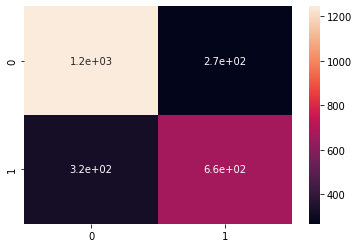

In [84]:
mostra_metricas(y1_test, y1_reglog_pred)

#### Gaussian Naive Bayes

In [85]:
from sklearn.naive_bayes import GaussianNB

In [86]:
modelNB1 = GaussianNB()

modelNB1.fit(X1_train.toarray(), y1_train)

y1_predict = modelNB1.predict(X1_test.toarray())

Acurácia:  0.6650660264105642

AUROC: 0.6866275469998875

F1-Score: 0.6674183385571624

Matriz de confusão:


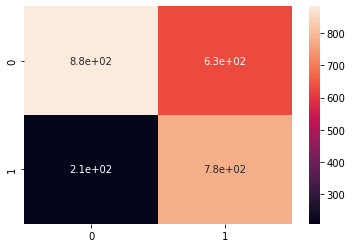

In [87]:
mostra_metricas(y1_test, y1_predict)

#### Naive Bayes Multinomial

In [88]:
from sklearn.naive_bayes import MultinomialNB

In [89]:
nbBOW = MultinomialNB()

nbBOW.fit(X1_train.toarray(), y1_train)

y1_nb_pred = nbBOW.predict(X1_test.toarray())

Acurácia:  0.7611044417767107

AUROC: 0.7478751547900484

F1-Score: 0.7605516755381236

Matriz de confusão:


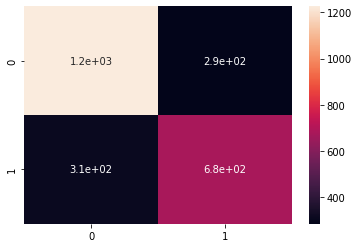

In [90]:
mostra_metricas(y1_test, y1_nb_pred)

### **TF-IDF (2)**

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [92]:
tfidf_vect = TfidfVectorizer(max_features=500)

In [93]:
text = df_train['lemmas'].apply(string)

X_tfidf_train = tfidf_vect.fit_transform(text)

In [94]:
text = df_test['lemmas'].apply(string)

X_tfidf_test = tfidf_vect.transform(text)

In [95]:
print(X_tfidf_train)

  (0, 302)	0.20168406184549045
  (0, 492)	0.3813355555868303
  (0, 271)	0.3950585991226947
  (0, 46)	0.2716223789367609
  (0, 254)	0.29152464342664397
  (0, 371)	0.29752063712093896
  (0, 87)	0.4087964015061448
  (0, 324)	0.20855019421012205
  (0, 196)	0.30247114721846036
  (0, 227)	0.3293252134831935
  (1, 182)	0.18080262093036112
  (1, 327)	0.20417526046212928
  (1, 83)	0.24363120013648654
  (1, 395)	0.3124081604070983
  (1, 167)	0.34045837831796133
  (1, 64)	0.2364208673181981
  (1, 153)	0.24782433755242803
  (1, 52)	0.2695140773951044
  (1, 163)	0.3555583098428201
  (1, 344)	0.3435051090320605
  (1, 380)	0.26902570037740137
  (1, 191)	0.24581171092234505
  (1, 183)	0.29255885651213837
  (2, 396)	0.2735784095608542
  (2, 460)	0.2906778628751821
  :	:
  (7998, 238)	0.13891978731381038
  (7998, 192)	0.1406648793373321
  (7998, 477)	0.08281642636584882
  (7998, 193)	0.0860819795141402
  (7998, 257)	0.08833527494490424
  (7998, 213)	0.1327995117711705
  (7998, 75)	0.08998468433715165
  

In [96]:
X_tfidf_train.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.55948904, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.2738047 , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [97]:
X_tfidf_test.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [98]:
X2_train = X_tfidf_train
y2_train = df_train['label']

X2_test = X_tfidf_test
y2_test = df_test['label']

#### Regressão Logística

In [99]:
reglog2 = LogisticRegression()

reglog2.fit(X2_train, y2_train)

y2_reglog_pred = reglog2.predict(X2_test)

Acurácia:  0.7707082833133253

AUROC: 0.7514142181695374

F1-Score: 0.7682892887414331

Matriz de confusão:


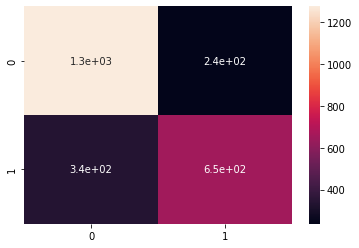

In [100]:
mostra_metricas(y2_test, y2_reglog_pred)

#### Gaussian Naive Bayes

In [101]:
modelNB2 = GaussianNB()

modelNB2.fit(X2_train.toarray(), y2_train)

y2_predict = modelNB2.predict(X2_test.toarray())

Acurácia:  0.7194877951180472

AUROC: 0.7245651806822019

F1-Score: 0.7224835294397548

Matriz de confusão:


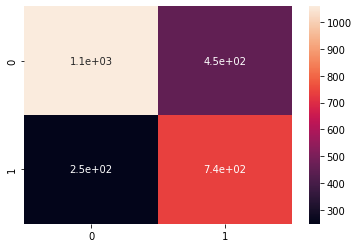

In [102]:
mostra_metricas(y2_test, y2_predict)

#### Naive Bayes Multinominal

In [103]:
nbTFIDF = MultinomialNB()

nbTFIDF.fit(X2_train.toarray(), y2_train)

y2_nb_pred = nbTFIDF.predict(X2_test.toarray())

Acurácia:  0.7366946778711485

AUROC: 0.6798590003377237

F1-Score: 0.7100095673359318

Matriz de confusão:


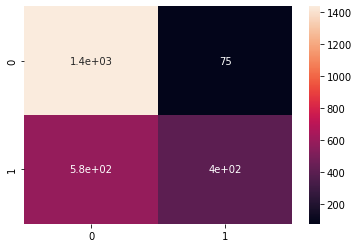

In [104]:
mostra_metricas(y2_test, y2_nb_pred)

### **Conclusões**

O modelo de Regressão Logística foi o que mostrou o melhor desempenho comparado aos demais, especialmente com as palavras vetorizadas pelo TF-IDF, com 77% de acurácia. Por essa razão, esse modelo será otimizado com o objetivo de alcançar um desempenho ainda melhor.

### **Regressão Logística otimizada**

In [105]:
text = df_dev['lemmas'].apply(string)

X_tfidf_dev = tfidf_vect.fit_transform(text)

In [106]:
labels = []

for x in df_dev['overall']:
  if x > 3:
     labels.append(1)
  else:
    labels.append(0)

df_dev['label'] = labels

In [107]:
X_dev = X_tfidf_dev
y_dev = df_dev['label']

In [108]:
from sklearn.model_selection import GridSearchCV

In [109]:
logreg_grid = {'C':  [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [110]:
logreg_GS = GridSearchCV(LogisticRegression(), logreg_grid, verbose = 2, scoring = 'accuracy')

In [111]:
logreg_GS.fit(X_dev, y_dev)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ........................................

C:\Users\isaca\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\isaca\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

[CV] END .............................................C=1000; total time=   0.0s
[CV] END .............................................C=1000; total time=   0.0s
[CV] END .............................................C=1000; total time=   0.0s
[CV] END .............................................C=1000; total time=   0.0s


C:\Users\isaca\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\isaca\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='accuracy', verbose=2)

In [112]:
print(logreg_GS.best_estimator_)

LogisticRegression(C=1)


Tendo em vista que C = 1 é o default para a Regressão Logística, a otimização não cumpriu com o resultado desejado. Entretanto, as métricas não tão elevadas podem ser justificadas pelo fato do modelo de predição utilizado ser mais básico, por isso não possuem um desempenho tão proveitoso quanto modelos que abrangem redes neurais.

## **Parte 4 - Embeddings (Word2Vec)**

In [113]:
import gensim
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser

In [114]:
# Detectando os bigramas

texto = [linha for linha in df_train['lemmas']]

phrases = Phrases(texto, min_count=30)
bigram = Phraser(phrases)

reviews = bigram[texto]

In [115]:
# Ajustando o modelo

modelo = Word2Vec(min_count=2, vector_size=80, window=2)

In [116]:
# Tabela de Vocabulário

modelo.build_vocab(reviews)

In [117]:
# Treinando o modelo

modelo.train(reviews, total_examples=modelo.corpus_count, epochs=20, report_delay=1) 

(15789116, 17722860)

#### Análise dos resultados

##### most_similar

In [118]:
modelo.wv.most_similar(positive = 'game')

[('gamebut', 0.599847674369812),
 ('gamethe', 0.5960521101951599),
 ('gamei', 0.5922689437866211),
 ('gameit', 0.5872412919998169),
 ('title', 0.580708384513855),
 ('gamesthe', 0.5445588827133179),
 ('gameoverall', 0.5347079634666443),
 ('rpgs', 0.5309397578239441),
 ('gamethis', 0.5240120887756348),
 ('gamesit', 0.5191558599472046)]

In [119]:
modelo.wv.most_similar(positive = 'character')

[('main_character', 0.6127033233642578),
 ('npc', 0.5735983848571777),
 ('personality', 0.518189013004303),
 ('companion', 0.5046131610870361),
 ('male', 0.4963417053222656),
 ('wrestler', 0.48199227452278137),
 ('preset', 0.4809494614601135),
 ('paragonrenegade', 0.4720008373260498),
 ('song', 0.46655645966529846),
 ('gender', 0.4661100208759308)]

##### similarity

In [120]:
modelo.wv.similarity('character', 'female')

0.42386305

In [121]:
modelo.wv.similarity('character', 'male')

0.49634168

In [122]:
modelo.wv.similarity('good', 'bad')

0.6473558

In [123]:
modelo.wv.similarity('bad', 'hate')

0.2986012

In [124]:
modelo.wv.similarity('problem', 'bad')

0.15379564

##### doesnt_match

In [125]:
modelo.wv.doesnt_match(['good', 'fun', 'great', 'bad'])

'fun'

In [126]:
modelo.wv.doesnt_match(['game', 'play', 'xbox', 'player', 'like'])

'like'

##### Analogias

In [127]:
def analogy(x1,x2,y1):
  y2 = modelo.wv.most_similar(positive = [y1, x2], negative = [x1])
  return y2

In [128]:
analogy('player', 'game', 'love')[0][0]

'hated'

In [129]:
analogy('great', 'fun', 'bad')[0][0]

'darn'